#Linear Regression and Machine Learning Model Building

In this practical you will discover how to build a machine learning model in google colab, using the libraries Pandas and Scikit Learn.

In the first step we download a blood pressure dataset.

Note here that "!" allows us to call a shell command.

"wget" is a utility to download things using an URL.

In [ ]:
!wget http://thomas.haschka.net/blood-pressure.csv

--2023-09-27 17:39:03--  http://thomas.haschka.net/blood-pressure.csv
Resolving thomas.haschka.net (thomas.haschka.net)... 149.202.48.113, 2001:41d0:401:3000::571b
Connecting to thomas.haschka.net (thomas.haschka.net)|149.202.48.113|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310 [text/csv]
Saving to: ‘blood-pressure.csv’

blood-pressure.csv  100%[===================>]     310  --.-KB/s    in 0s      

2023-09-27 17:39:03 (28.3 MB/s) - ‘blood-pressure.csv’ saved [310/310]



The data in question is a simple csv file. We can view it using the cat command

In [ ]:
!cat blood-pressure.csv

Index,Age,Pressure
1,39,144
2,47,220
3,45,138
4,47,145
5,65,162
6,46,142
7,67,170
8,42,124
9,67,158
10,56,154
11,64,162
12,56,150
13,59,140
14,34,110
15,42,128
16,48,130
17,45,135
18,17,114
19,20,116
20,19,124
21,36,136
22,50,142
23,39,120
24,21,120
25,44,160
26,53,158
27,63,144
28,29,130
29,25,125
30,69,175


To work with datasets like these a python library named pandas comes to help. It allows us to import the dataset into python, into a so called pandas dataframe.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('blood-pressure.csv')

In [ ]:
df

,Index,Age,Pressure
0,1,39,144
1,2,47,220
2,3,45,138
3,4,47,145
4,5,65,162
5,6,46,142
6,7,67,170
7,8,42,124
8,9,67,158
9,10,56,154


Looking at the blood pressure dataset we see an index column in the dataset. We do not want or need this column and hence we will get rid of it by the following command.

In [ ]:
df.pop('Index');

In [ ]:
df

,Age,Pressure
0,39,144
1,47,220
2,45,138
3,47,145
4,65,162
5,46,142
6,67,170
7,42,124
8,67,158
9,56,154


A good idea when working with a new dataset is to plot it, and visually inspect the data, if possible.

<Axes: xlabel='Age', ylabel='Pressure'>

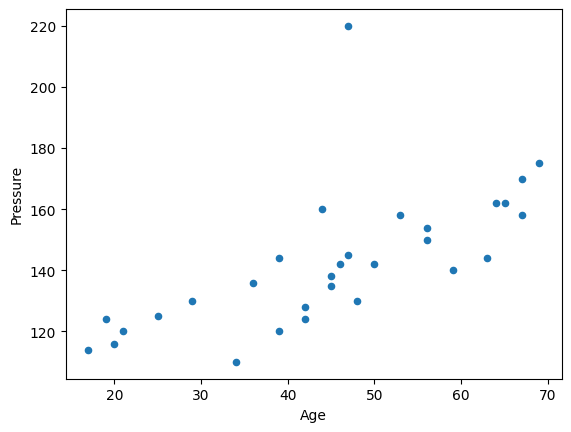

In [ ]:
df.plot.scatter(x='Age',y='Pressure')

We clearly see a linear relationship between the age and the blood pressure. We thus postulate that we can predict the blood pressure fairly accurate in knowing someones age.

As we see this linear relationship we will go with one of the simplest machine learning methods. LinearRegression.

In [ ]:
from sklearn.linear_model import LinearRegression

The LinearRegression in Scikit-Learn only supports the L2 norm during regression.

In order to further try regression with the L1 norm we install the scikit-lego package using pip.

In [ ]:
!pip install scikit-lego

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=8b9ad0ceead0a4ea2c1d2e5dd350bd77fa22f738c3b1de4e2e85d18525473927
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=1e469bae73d2169639c3bfde16eda5c9921c3135c7597276a53870e3a469a201
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
from sklego.linear_model import LADRegression

In [ ]:
L_two_reg = LinearRegression()
L_one_reg = LADRegression()

We define X to be our model's features and Y to be our model's target

In [ ]:
X = df['Age'].to_numpy().reshape(-1,1)
Y = df['Pressure'].to_numpy()

In [ ]:
X

array([[39],
       [47],
       [45],
       [47],
       [65],
       [46],
       [67],
       [42],
       [67],
       [56],
       [64],
       [56],
       [59],
       [34],
       [42],
       [48],
       [45],
       [17],
       [20],
       [19],
       [36],
       [50],
       [39],
       [21],
       [44],
       [53],
       [63],
       [29],
       [25],
       [69]])

In [ ]:
Y

array([144, 220, 138, 145, 162, 142, 170, 124, 158, 154, 162, 150, 140,
       110, 128, 130, 135, 114, 116, 124, 136, 142, 120, 120, 160, 158,
       144, 130, 125, 175])

We train the Linear Regression predictors

In [ ]:
L_two_reg.fit(X,Y)

LinearRegression()

In [ ]:
L_one_reg.fit(X,Y)

LADRegression()

And plot the results.

In [ ]:
from matplotlib import pyplot as plt

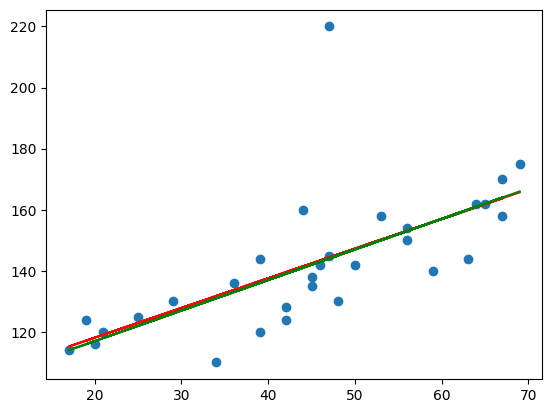

In [ ]:
plt.scatter(X,Y)
plt.plot(X, L_two_reg.predict(X), 'r')
plt.plot(X, L_one_reg.predict(X), 'g')

We inspect the linear regression coefficients, and intercepts.

If the line has the form y = ax+b, **a** is the coefficient, and **b** the intercept

Both are in this case model parameters

In [ ]:
L_one_reg.coef_

array([1.])

In [ ]:
L_one_reg.intercept_

97.0000000000042

In [ ]:
L_two_reg.coef_

array([0.97087035])

In [ ]:
L_two_reg.intercept_

98.71471813821842

Let us use our trained simple machine learning model to predict the blood pressure at the age of 25.

In [ ]:
L_one_reg.predict([[25]])

array([122.])

# 2nd Part Let us build something more real

We download and inspect the skin-cancer dataset

In [ ]:
!wget http://thomas.haschka.net/skin-cancer.csv

--2023-09-27 19:29:02--  http://thomas.haschka.net/skin-cancer.csv
Resolving thomas.haschka.net (thomas.haschka.net)... 149.202.48.113, 2001:41d0:401:3000::571b
Connecting to thomas.haschka.net (thomas.haschka.net)|149.202.48.113|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32605 (32K) [text/csv]
Saving to: ‘skin-cancer.csv’

skin-cancer.csv     100%[===================>]  31.84K  --.-KB/s    in 0.1s    

2023-09-27 19:29:03 (332 KB/s) - ‘skin-cancer.csv’ saved [32605/32605]



In [ ]:
df = pd.read_csv('skin-cancer.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                199 non-null    int64  
 1   radius_0                  199 non-null    float64
 2   texture_0                 199 non-null    float64
 3   perimeter_0               199 non-null    float64
 4   radius_1                  199 non-null    float64
 5   texture_1                 199 non-null    float64
 6   perimeter_1               199 non-null    float64
 7   radius_2                  199 non-null    float64
 8   texture_2                 199 non-null    float64
 9   perimeter_2               199 non-null    float64
 10  age                       199 non-null    int64  
 11  cancer_type               199 non-null    int64  
 12  diff_diagnose_traitement  199 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 20.3 KB


In [ ]:
df

,Unnamed: 0,radius_0,texture_0,perimeter_0,radius_1,texture_1,perimeter_1,radius_2,texture_2,perimeter_2,age,cancer_type,diff_diagnose_traitement
0,0,19.858394,27.204437,136.324256,22.683290,32.802578,119.523841,21.477052,27.307087,82.366936,44,0,19267200.0
1,1,14.182069,15.754730,80.916983,14.043753,30.094704,94.911073,15.012329,17.855131,103.078286,59,1,110160000.0
2,4,14.875600,17.534187,98.545830,14.380683,26.190447,89.712492,12.930685,19.856687,108.380754,21,1,49420800.0
3,7,14.292161,28.430808,81.293588,15.042501,36.480522,78.668608,14.584187,24.055640,126.014415,40,1,62467200.0
4,8,13.119916,14.619103,88.293516,13.093215,12.299673,81.907981,13.963749,16.908342,56.235029,43,1,21081600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,390,14.848246,20.464676,117.535591,15.405057,22.227830,106.933004,16.341575,19.945252,176.030398,36,0,62035200.0
195,391,21.081445,20.429425,114.246985,17.505730,49.229470,161.196507,18.300994,22.080930,120.032441,27,0,42595200.0
196,392,21.452732,24.270587,165.240157,18.315527,27.464137,112.425470,18.751829,17.959451,69.344406,18,0,39571200.0
197,395,11.901766,14.899430,75.271179,11.915226,27.449196,83.673309,11.747213,22.852121,134.297230,34,1,36806400.0


We need to drop column "Unnamed: 0" as she is redundant.

In [ ]:
df.pop('Unnamed: 0')

0        0
1        1
2        4
3        7
4        8
      ... 
194    390
195    391
196    392
197    395
198    396
Name: Unnamed: 0, Length: 199, dtype: int64

Using the corr() function of the dataframe we can see how each columns correlate to each other.

0 is decorrelated

1 is correlated

Be aware that this is the so called "pearson correlation" and only finds linear correlations. Other correlations might exist. Nevertheless this function allows us to gain insights into how each of the variables influence each others.

In [ ]:
df.corr()

,radius_0,texture_0,perimeter_0,radius_1,texture_1,perimeter_1,radius_2,texture_2,perimeter_2,age,cancer_type,diff_diagnose_traitement
radius_0,1.000000,0.005180,0.113626,0.115054,0.075092,0.159065,0.176054,0.064614,-0.128659,-0.044083,-0.196300,-0.047974
texture_0,0.005180,1.000000,0.172410,0.160895,0.048974,0.157387,0.077206,0.535808,0.023621,0.006985,-0.200378,-0.067880
perimeter_0,0.113626,0.172410,1.000000,0.800726,0.173756,0.808725,0.800986,0.227519,-0.034451,-0.025681,-0.716731,-0.074262
radius_1,0.115054,0.160895,0.800726,1.000000,0.181463,0.806034,0.843829,0.181725,0.028822,-0.057534,-0.652302,-0.045702
texture_1,0.075092,0.048974,0.173756,0.181463,1.000000,0.166426,0.097320,0.094882,0.034127,0.040817,-0.154492,-0.057287
perimeter_1,0.159065,0.157387,0.808725,0.806034,0.166426,1.000000,0.850733,0.170825,-0.000843,-0.086787,-0.676054,-0.081380
radius_2,0.176054,0.077206,0.800986,0.843829,0.097320,0.850733,1.000000,0.105429,-0.034821,-0.116326,-0.654383,-0.043123
texture_2,0.064614,0.535808,0.227519,0.181725,0.094882,0.170825,0.105429,1.000000,0.022665,0.036192,-0.224638,-0.031336
perimeter_2,-0.128659,0.023621,-0.034451,0.028822,0.034127,-0.000843,-0.034821,0.022665,1.000000,0.027561,0.051434,0.015842
age,-0.044083,0.006985,-0.025681,-0.057534,0.040817,-0.086787,-0.116326,0.036192,0.027561,1.000000,-0.028440,0.125651


In order to obtain featurs and targets we will separate the 'cancer_type' column from the dataset. We can do this directly with the pop functions as she returns the values from the column removed from the dataset.

In [ ]:
Y = df.pop('cancer_type')

A problem that we have with our dataset is that the units of the different measurements are not at all at the same scale. Especially the time difference is clearly off scale. This can have devastating effects on the internal workings of the classifiers, as such we will rescale each column to 0 mean, and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().fit(df)

In [ ]:
X_scaled = scaler.transform(df)

Once we have our rescaled samples and their features at hand we perform a Train/Testset split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

We fit a simple support vector machine classifier, in oder to make predictions

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,Y_train)

SGDClassifier()

We see using our Testset that we arrive to predict 77.5% of the data found in the testset.

In [ ]:
clf.score(X_test, Y_test)

0.775

Testing models 1 by 1 can be a tedious task.
Especially if the result can be improved on.

We also do not want to perform the cross validation manually.
As such we test a whole bunch of classifiers, and if they arrive to classify our data correctly.
Cross validation can help us to score them all. Performing multiple splits into training and testset is also a more accurate prove that the model will work instead of a simple training/testset split.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import cross_val_score, ShuffleSplit

cv = ShuffleSplit(n_splits=10, train_size=0.8, test_size=0.2)

names = ['Nearest Neigbours', 'Support Vector Machine', 'Gaussian Process',
         'Decision Tree', 'Random Forest', 'Ada Boost', 'Naive Bayes', 'QDA']

clfs = [ KNeighborsClassifier(), SVC(kernel='linear'),
        GaussianProcessClassifier(), DecisionTreeClassifier(),
        RandomForestClassifier(), AdaBoostClassifier(), GaussianNB(),
        QuadraticDiscriminantAnalysis()]

for i in range(len(clfs)):
  clf = clfs[i]
  scores = cross_val_score(clf, X_scaled, Y.to_numpy(),cv=cv)
  print(names[i] + " %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Nearest Neigbours 0.87 (+/- 0.10)
Support Vector Machine 0.91 (+/- 0.08)
Gaussian Process 0.86 (+/- 0.11)
Decision Tree 0.83 (+/- 0.05)
Random Forest 0.88 (+/- 0.10)
Ada Boost 0.82 (+/- 0.10)
Naive Bayes 0.87 (+/- 0.10)
QDA 0.80 (+/- 0.09)


We see from the code above that the Support Vector Machine Classifier results in the best results. As such we will build a complete model around him.

As we want the imput to the model in the same way as it occurs in the dataset and do not want to manually rescale the data before making predictions, we built the StandardScaler into the model using the Pipeline tool.

In [ ]:
from sklearn.pipeline import Pipeline
model = Pipeline([('scaler',StandardScaler()),('svc', SVC(kernel='linear'))])

Again we split into training ant testset in the same dimensions as we have used for the cross validation.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df.to_numpy(), Y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

We fit the model

In [ ]:
model.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])

and veryfy a last time that it works and gives a nice score

In [ ]:
model.score(X_test,Y_test)

0.85

In [ ]:
X_test[0]

array([1.83709245e+01, 1.73806136e+01, 1.31142042e+02, 1.94917405e+01,
       4.09141826e+01, 1.25594315e+02, 2.16322524e+01, 1.48047301e+01,
       1.97506191e+02, 3.10000000e+01, 5.18400000e+07])

We predict if a patient from the testset has cancer or not

In [ ]:
model.predict([[1.83709245e+01, 1.73806136e+01, 1.31142042e+02, 1.94917405e+01,
                4.09141826e+01, 1.25594315e+02, 2.16322524e+01, 1.48047301e+01,
                1.97506191e+02, 3.10000000e+01, 5.18400000e+07]])

array([0])